In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
data_path = './run/tables/deeplab-resnet/experiment_4/'

In [3]:
train_folder = os.path.join(data_path, 'train')
val_folder = os.path.join(data_path, 'val')

In [4]:
acc_list = [[], [], []]
recall_list = [[], [], []]

for i in np.arange(10):
    fn = "cm_{0}.csv".format(i)
    cm = pd.read_csv(os.path.join(train_folder, fn), index_col=0, header=0)
    true_val = np.sum(cm, axis=1)
    det_val = np.sum(cm, axis=0)
    for c_i in [0, 1, 2]:
        acc = cm.iloc[c_i, c_i] / true_val[c_i]
        recall = cm.iloc[c_i, c_i] / det_val[c_i]
        acc_list[c_i].append(acc)
        recall_list[c_i].append(recall)

In [5]:
line_style = ['dotted', 'dashed', 'dashdot']
markers = ['o', 's', '*']
labels = ['lines', 'text', 'background']

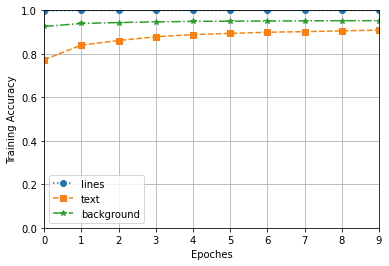

In [6]:
plt.figure()
for i in np.arange(len(acc_list)):
    plt.plot(acc_list[i], linestyle=line_style[i], marker=markers[i], label=labels[i])
plt.ylim(0, 1)
plt.xlim(0, 9)
plt.grid()
plt.xlabel('Epoches')
plt.ylabel('Training Accuracy')
plt.legend()

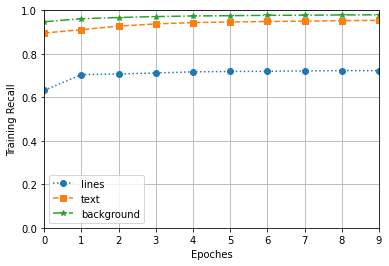

In [7]:
plt.figure()
for i in np.arange(len(recall_list)):
    plt.plot(recall_list[i], linestyle=line_style[i], marker=markers[i], label=labels[i])
plt.ylim(0, 1)
plt.xlim(0, 9)
plt.grid()
plt.xlabel('Epoches')
plt.ylabel('Training Recall')
plt.legend()

In [8]:
acc_list = [[], [], []]
recall_list = [[], [], []]

for i in np.arange(10):
    fn = "cm_{0}.csv".format(i)
    cm = pd.read_csv(os.path.join(val_folder, fn), index_col=0, header=0)
    true_val = np.sum(cm, axis=1)
    det_val = np.sum(cm, axis=0)
    for c_i in [0, 1, 2]:
        acc = cm.iloc[c_i, c_i] / true_val[c_i]
        recall = cm.iloc[c_i, c_i] / det_val[c_i]
        acc_list[c_i].append(acc)
        recall_list[c_i].append(recall)

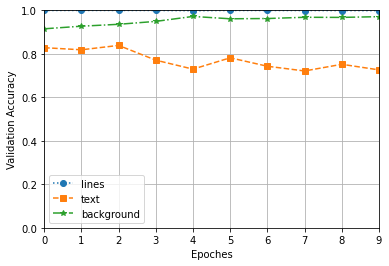

In [10]:
plt.figure()
for i in np.arange(len(acc_list)):
    plt.plot(acc_list[i], linestyle=line_style[i], marker=markers[i], label=labels[i])
plt.ylim(0, 1)
plt.xlim(0, 9)
plt.grid()
plt.xlabel('Epoches')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('ValidationAccuracy.pdf')

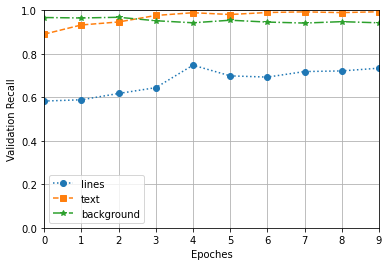

In [11]:
plt.figure()
for i in np.arange(len(recall_list)):
    plt.plot(recall_list[i], linestyle=line_style[i], marker=markers[i], label=labels[i])
plt.ylim(0, 1)
plt.xlim(0, 9)
plt.grid()
plt.xlabel('Epoches')
plt.ylabel('Validation Recall')
plt.legend()
plt.savefig('ValidationRecall.pdf')

In [12]:
train_loss_f = './results/run-tables_deeplab-resnet_experiment_4-tag-train_total_loss_iter.csv'
val_mIou_f = './results/run-tables_deeplab-resnet_experiment_4-tag-val_mIoU.csv'

In [13]:
train_loss = pd.read_csv(train_loss_f)
val_mIou = pd.read_csv(val_mIou_f)

In [14]:
train_loss.head()

,Wall time,Step,Value
0,1.592622e+09,18,0.031437
1,1.592622e+09,42,0.018166
2,1.592622e+09,45,0.017222
3,1.592622e+09,71,0.012499
4,1.592622e+09,94,0.010580


In [15]:
val_mIou.head()

,Wall time,Step,Value
0,1.592623e+09,0,0.740700
1,1.592625e+09,1,0.752914
2,1.592626e+09,2,0.775518
3,1.592628e+09,3,0.769109
4,1.592629e+09,4,0.796330


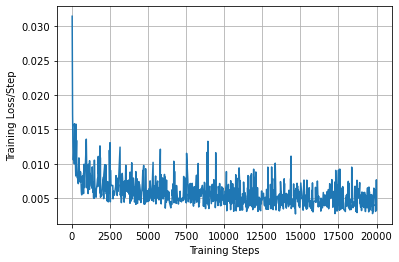

In [16]:
plt.figure()
plt.plot(train_loss['Step'], train_loss['Value'])
plt.grid()
plt.xlabel("Training Steps")
plt.ylabel("Training Loss/Step")
# plt.xlim([0, 20000])
plt.savefig('TrainingLossStep.pdf')

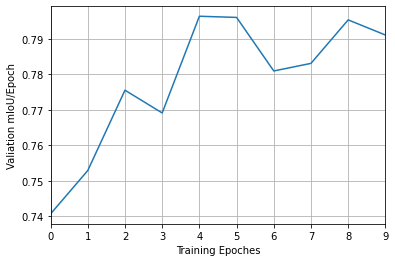

In [17]:
plt.figure()
plt.plot(val_mIou['Step'], val_mIou['Value'])
plt.grid()
plt.xlabel("Training Epoches")
plt.ylabel("Valiation mIoU/Epoch")
plt.xlim([0, 9])
plt.savefig('ValidationMIOUEpoch.pdf')